In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [20]:
plt.rcParams["figure.figsize"] = (15,8) #set size of plot
plt.rcParams.update({'font.size': 22})

In [21]:
os.chdir('/home/MA')

**PV production calculation**

Methodology based on this paper: https://www.researchgate.net/publication/331837767_The_energetic_implications_of_introducing_lithium-ion_batteries_into_distributed_photovoltaic_systems

Get local data from https://re.jrc.ec.europa.eu/pvg_tools/en/#HR
for years 2010-2016 to average yearly variability
Solar panels were assumed to be 46 inclined towards south to maximize yearly yield without the need for sophisticated mechanic installations.

Read data into dataframe

In [22]:
meteo_data = pd.read_csv('Data/PV_Sevilla.csv')

In [23]:
meteo_data.head()

,time,G(i),H_sun,T2m,WS10m,Int
0,20100101:0009,0.0,0.0,13.73,3.50,0
1,20100101:0109,0.0,0.0,13.47,3.22,0
2,20100101:0209,0.0,0.0,13.21,2.93,0
3,20100101:0309,0.0,0.0,12.95,2.65,0
4,20100101:0409,0.0,0.0,13.21,2.57,0


Convert time column to datetime format to facilitate data processing

In [24]:
meteo_data['time'] = pd.to_datetime(meteo_data['time'], format='%Y%m%d:%H%M')

Get rid of leap years

In [25]:
meteo_data = meteo_data[~((meteo_data.time.dt.month == 2) & (meteo_data.time.dt.day == 29))]

Check length of dataset to be 7 years x 365 days/year x 24 hours/day = 61320 days

In [26]:
len(meteo_data)

61320

Check date of maximum value

In [27]:
meteo_data[meteo_data['G(i)'] == meteo_data['G(i)'].max()]

,time,G(i),H_sun,T2m,WS10m,Int
52716,2016-01-06 12:09:00,1528.42,29.93,15.29,3.28,1


This is the absolute amount of radiation incident on a solar cell in Oslo without accounting for the conversion efficiency. 
As expected, it occurs on the 22th of March, the date where the sun's angle is exactly perpendicular to the panel's orientation.

Calculate hourly averages over the defined period of years by grouping and taking the mean.

In [28]:
hourly_average=meteo_data.groupby([meteo_data["time"].dt.month, meteo_data["time"].dt.day, meteo_data["time"].dt.hour]).mean()

In [29]:
hourly_average.index.names = ["month", "day", "hour"]

Define conversion efficiency

In [30]:
conv_eff = 0.2 # 2020 slide 7 on https://www.ise.fraunhofer.de/content/dam/ise/de/documents/publications/studies/Photovoltaics-Report.pdf

Calculate power production

In [31]:
hourly_average['Prod/m2'] = hourly_average['G(i)']*conv_eff/1000
hourly_average.head(24)

G(i)      H_sun        T2m     WS10m       Int   Prod/m2
month day hour                                                                
1     1   0       0.000000   0.000000  13.540000  2.037143  0.000000  0.000000
          1       0.000000   0.000000  13.345714  2.068571  0.000000  0.000000
          2       0.000000   0.000000  13.151429  2.102857  0.000000  0.000000
          3       0.000000   0.000000  12.952857  2.132857  0.000000  0.000000
          4       0.000000   0.000000  13.007143  2.107143  0.000000  0.000000
          5       0.000000   0.000000  13.058571  2.081429  0.000000  0.000000
          6       0.000000   0.000000  13.112857  2.058571  0.000000  0.000000
          7       0.000000   0.000000  13.320000  2.080000  0.000000  0.000000
          8     119.848571   3.891429  13.522857  2.102857  0.000000  0.023970
          9     332.527143  13.830000  13.730000  2.127143  0.142857  0.066505
          10    365.911429  21.490000  14.201429  2.552857  0.142857  0.073182
          11    454.005714  26.910000  14.668571  2.978571  0.142857  0.090801
          12    485.662857  29.460000  15.131429  3.407143  0.142857  0.097133
          13    627.510000  28.780000  15.458571  3.368571  0.142857  0.125502
          14    511.617143  24.960000  15.781429  3.328571  0.142857  0.102323
          15    471.622857  18.520000  16.112857  3.292857  0.142857  0.094325
          16    216.844286  10.100000  15.864286  3.167143  0.142857  0.043369
          17      0.000000   0.207143  15.624286  3.040000  0.714286  0.000000
          18      0.000000   0.000000  15.381429  2.917143  0.000000  0.000000
          19      0.000000   0.000000  15.064286  2.868571  0.000000  0.000000
          20      0.000000   0.000000  14.747143  2.820000  0.000000  0.000000
          21      0.000000   0.000000  14.430000  2.770000  0.000000  0.000000
          22      0.000000   0.000000  14.452857  2.695714  0.000000  0.000000
          23      0.000000   0.000000  14.478571  2.615714  0.000000  0.000000

In [32]:
PV_size = 6 #kW_p

In [33]:
size = 6*PV_size # m2 necessary for 6 kW_p
# https://www.energieheld.de/solaranlage/photovoltaik
# https://www.energieheld.ch/solaranlagen/photovoltaik#:~:text=Rechnen%20Sie%20im%20Durchschnitt%20etwa,dieser%20Gr%C3%B6sse%20installieren%20zu%20k%C3%B6nnen.

In [34]:
hourly_average['Prod'] = hourly_average['Prod/m2']*size

Calculate yearly production

In [35]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

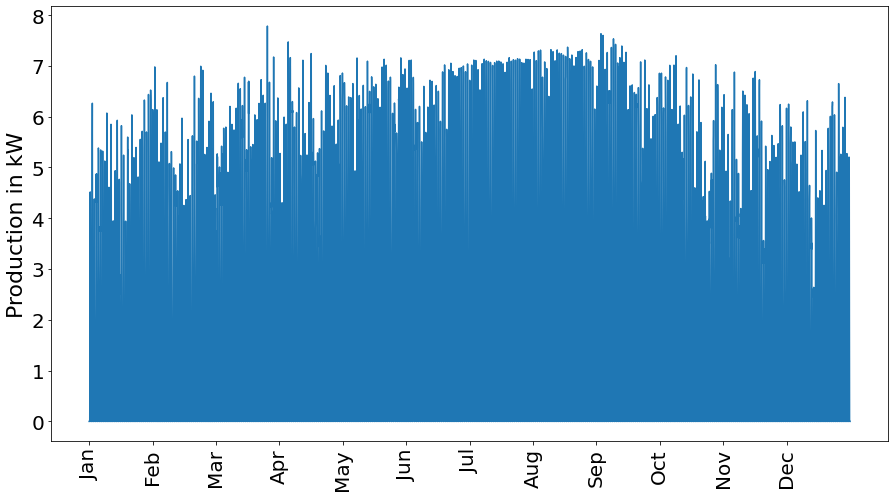

In [36]:
ax = hourly_average['Prod'].plot(fontsize = 20, ylabel = 'Production in kW', xlabel ='');
ax.set_xticks(np.arange(0, 8760, 730).tolist());
ax.set_xticklabels(months, rotation=90);

In [37]:
fig = ax.get_figure()

In [38]:
fig.savefig('Plots/Solar_CH.jpg')

In [39]:
yearly_PV_prod = hourly_average['Prod'].sum()

In [40]:
yearly_PV_prod

15616.107051428571

In [41]:
hourly_average['Prod'].to_pickle('Calculations/Spain/PV_production_Spain.pkl')